Mounted at /content/drive
Python 3.10.12
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7e8376be91b0>, {})
Q_table
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7e8376be91b0>, {})
10
Q_table
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7e8376be91b0>, {'None': [6.974674543611216, -0.10000000000000142, -0.10000000000000142, -0.10000000000000142], "[6, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[7, -1, '1000']": [10.0, 10.0, 10.0, 10.0], "[7, 0, '1111']": [7.131250774862762, -0.10000000000000142, 7.177305325982752, 7.3211735853075], "[6, 0, '1110']": [7.911541460175564, -0.10000000000000142, 7.935419077288185, 7.935268582592442], "[5, 0, '1110']": [7.787429856326352, -0.10000000000000142, 8.426347647996304, 8.459124184321059], "[5, 1, '0011']": [9.946720446094439, 9.891, 9.9, 9.929093741592899], "[4, 2, '1111']": [10.0, 10.0, 9.856990968452635, 10.0], "[5, 2, '0001']": [10.0, 10.0, 9.8, 10.0], "[6, 1, '1111']": [9.8, 9.922

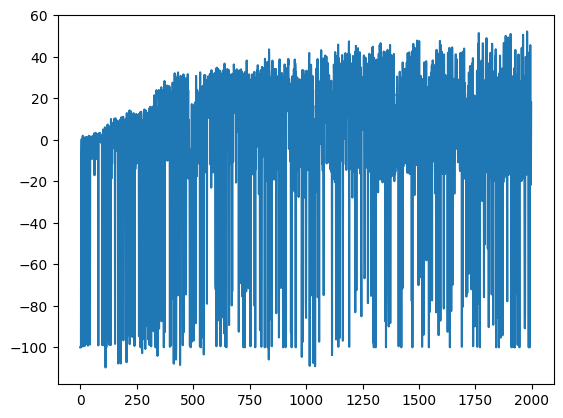

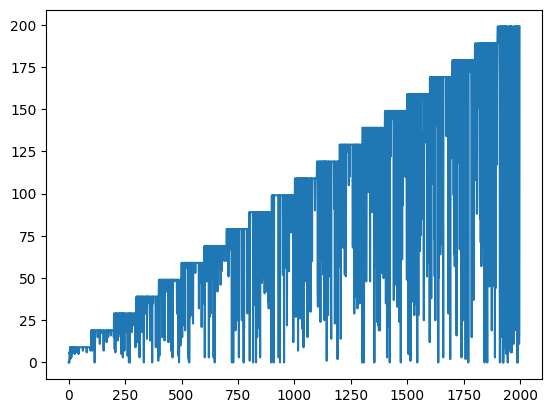

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environmenttt.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import time

start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

global lr
lr=0.1
global df
df=0.9
global eps
eps=0.02
global number_of_steps
number_of_steps = 1998

reward=0



class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        self.q_table = defaultdict(lambda: [10.0, 10.0, 10.0, 10.0])
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        global number_of_steps

        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon:
            # take random action
            if n-20>=trial:
              action = np.random.choice(self.actions)
            else:

              state_action = self.q_table[state]
              action = self.arg_max(state_action)
        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    global qarr
    print(qarr)

    episode_plot=[]
    reward_sum_plot=[]
    trial_plot=[]

    for episode in range(number_of_steps):
        state = env.reset()

        if episode%100==0:
            print("Q_table")
            print(qarr)


        #global number_of_steps
        n=(episode//100)*10+10
        if episode%100==0:
          print(n)
        for trial in range(n):
            env.render()

            # take action and proceed one step in the environment
            action = agent.get_action(str(state))
            next_state, reward, done, reward_sum = env.step(action)

            # with sample <s,a,r,s'>, agent learns new q function
            agent.learn(str(state), action, reward, str(next_state))

            state = next_state
            #env.print_value_all(agent.q_table)

            if trial==n-1:
                done=True

            # if episode ends, then break
            if done:

                #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                episode_plot=np.concatenate((episode_plot, [episode]))
                reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                trial_plot = np.concatenate((trial_plot, [trial]))


                break





f=plt.figure(1)
plt.plot(episode_plot, reward_sum_plot)
f.show()

g=plt.figure(2)
plt.plot(episode_plot, trial_plot)
g.show()

data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

import csv

# field names
#fields = ['Episode', 'Reward', 'Trials']

# data rows of csv file
rows = data_array

# name of csv file
#filename = "university_records.csv"
filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/RP3_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'
print(filename)

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    #csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)
#agent.q_table()
print((time.time() - start_time))
#plt.pause(0)